<a href="https://colab.research.google.com/github/pranavi2013/AIML_2024/blob/main/big_mart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split


In [2]:
#Read the data
df_train = pd.read_csv('/content/Train.csv')

In [3]:
#See first 10 rows
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
#print number of rows and columns separately

print("Number of Rows:",df_train.shape[0])
print("Number of Features:",df_train.shape[1])

Number of Rows: 8523
Number of Features: 12


In [5]:
#see dataset information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Check for missing values
missing_values = df_train.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [7]:
# Fill missing values for numerical column "Item_Weight" with mean
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)

# Fill missing values for categorical column "Outlet_Size" with mode
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)

# Verify if there are any missing values left
missing_values_after = df_train.isnull().sum()
print("Missing values after handling:")
print(missing_values_after)

Missing values after handling:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [8]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [9]:
#Calculate mode of Outlet_Size column for each Outlet_Type in Outlet_Size
df_train.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode)

Outlet_Type
Grocery Store        Medium
Supermarket Type1    Medium
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [10]:
#Fill missing values in Outlet_Size column with mode of Outlet_Size column for each Outlet_Type in Outlet_Size
df_train.loc[df_train['Outlet_Type']=='Grocery Store','Outlet_Size']='Small'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type1','Outlet_Size']='Small'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type2','Outlet_Size']='Medium'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type3','Outlet_Size']='Medium'

In [11]:
#Check for missing values
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
#See descriptive statistics of numerical columns
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
#applying Seaborn's default aesthetic settings to your plots
sns.set()

<ipython-input-14-29a67d0664cb>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col])


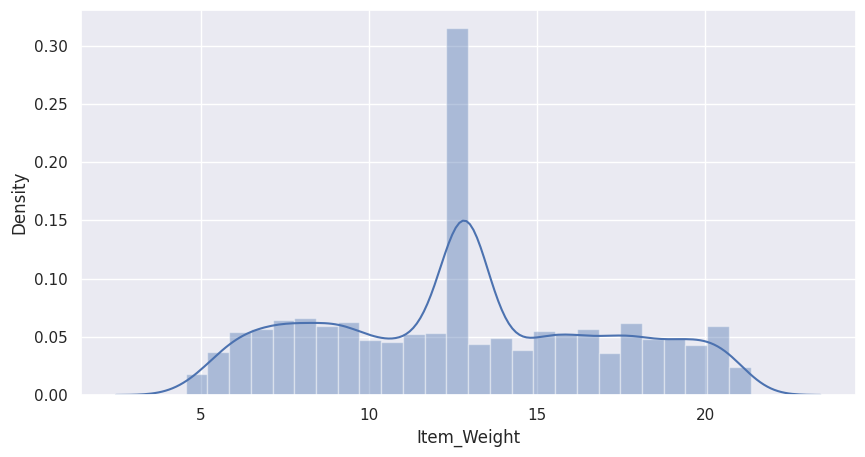

<ipython-input-14-29a67d0664cb>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col])


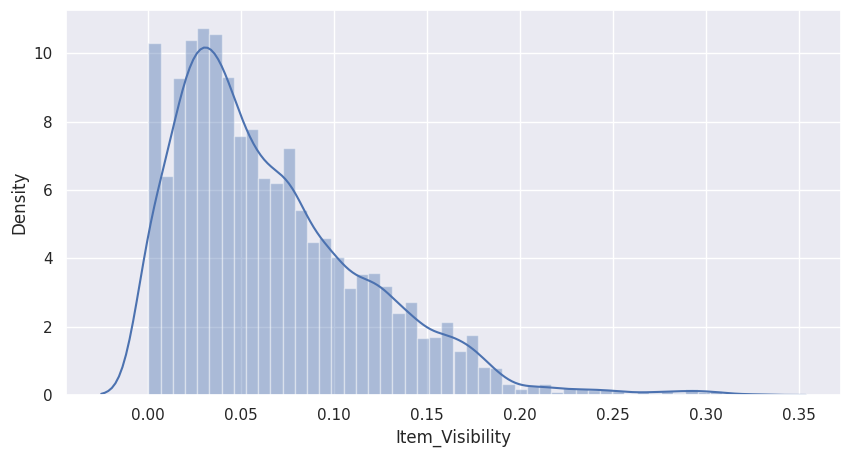

<ipython-input-14-29a67d0664cb>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col])


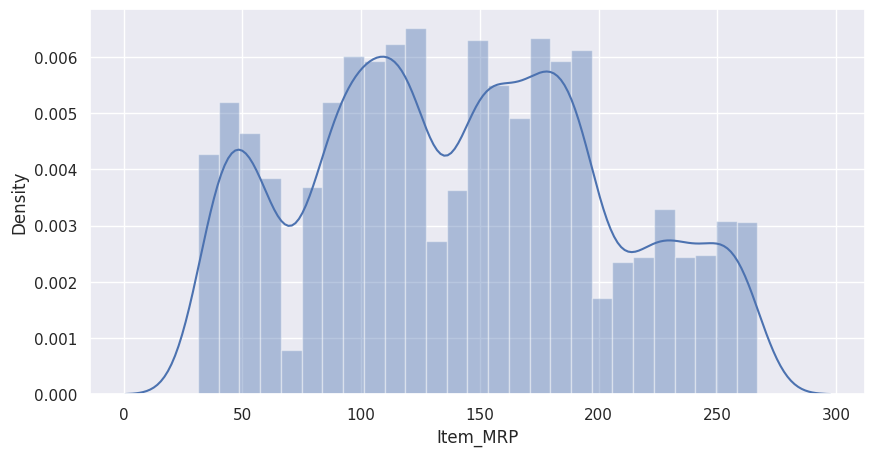

<ipython-input-14-29a67d0664cb>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col])


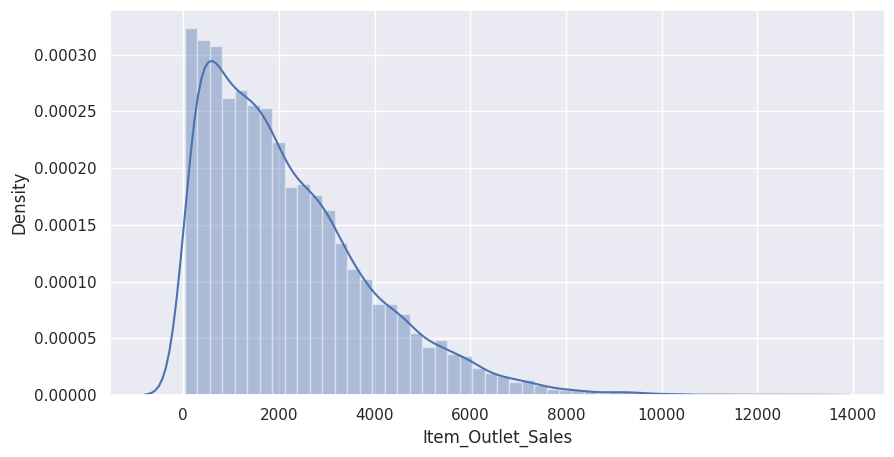

In [14]:
#Plot distplot for numerical columns
cols = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.distplot(df_train[col])
    plt.show()

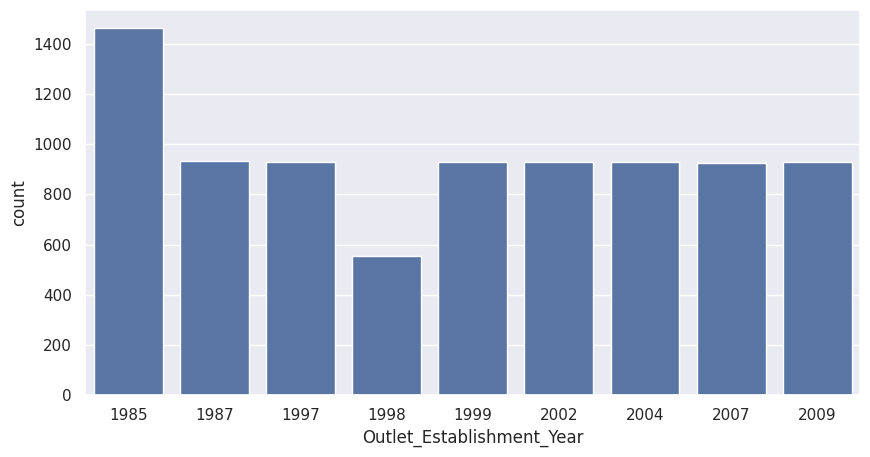

In [15]:
#Plot countplot for Outlet_Establishment_Year column
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year', data=df_train)
plt.show()

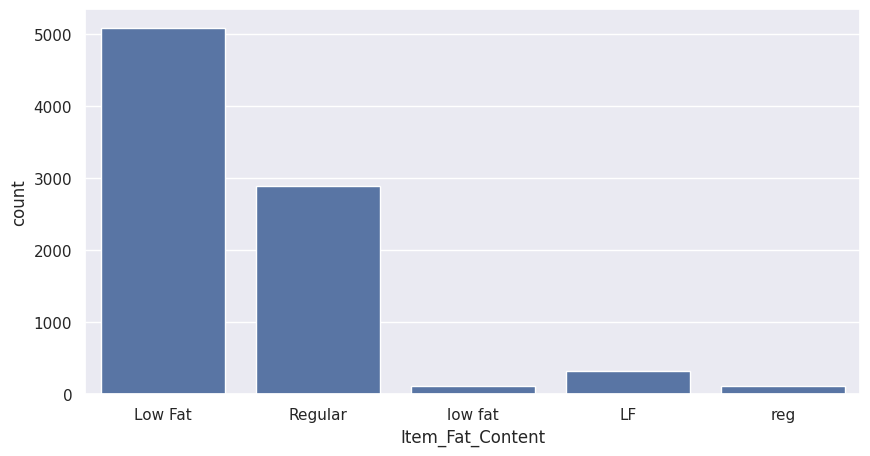

In [ ]:
#Plot countplot for Item_Fat_Content column
plt.figure(figsize=(10,5))
sns.countplot(x= "Item_Fat_Content" , data=df_train)
plt.show()

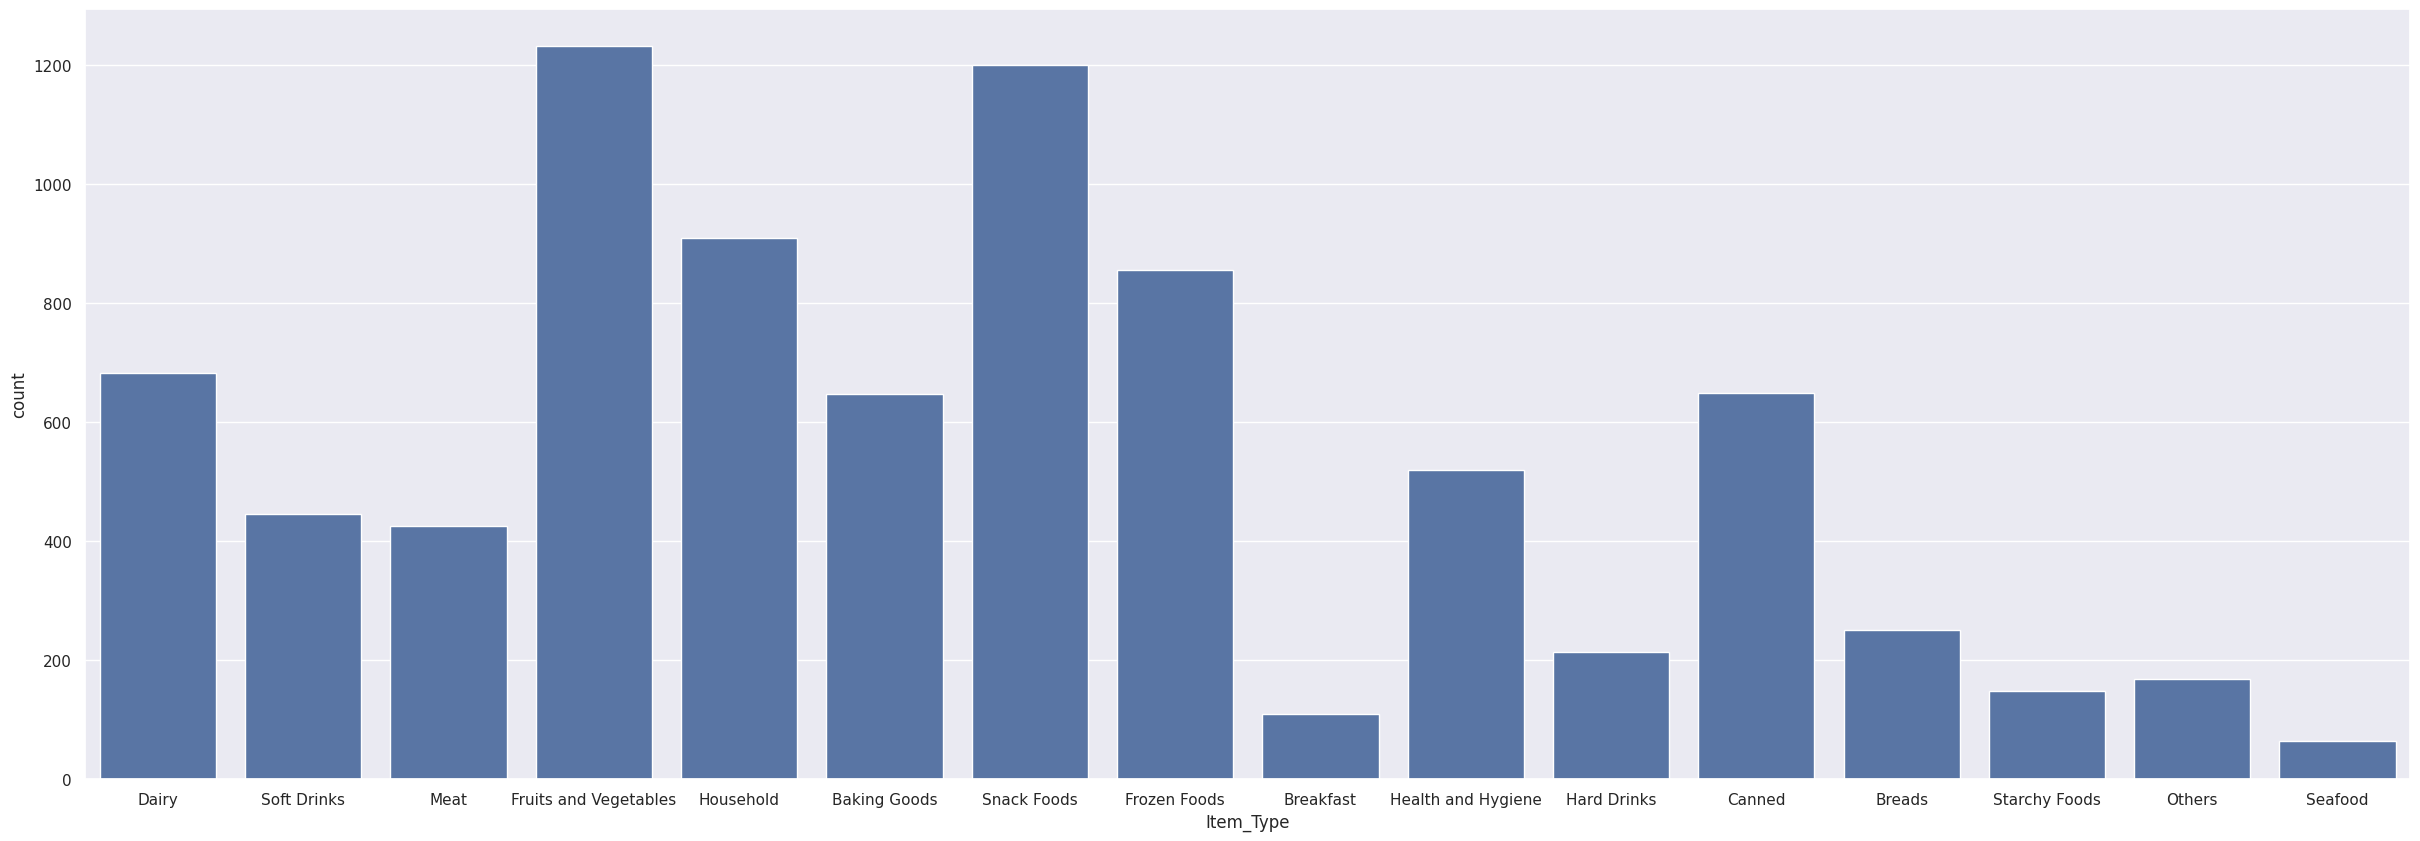

In [16]:
#Plot countplot for Item_Type column
plt.figure(figsize=(30,10))
sns.countplot(x= "Item_Type" , data=df_train)
plt.show()

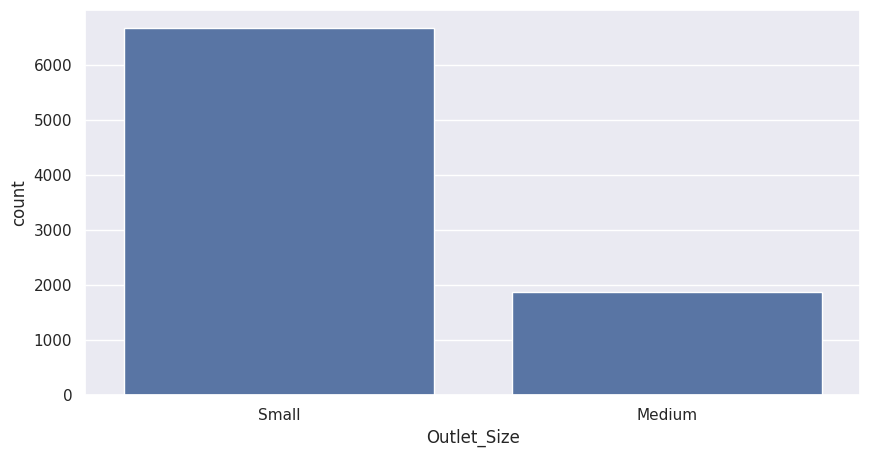

In [17]:
#Plot countplot for Outlet_Size column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Size" , data=df_train)
plt.show()

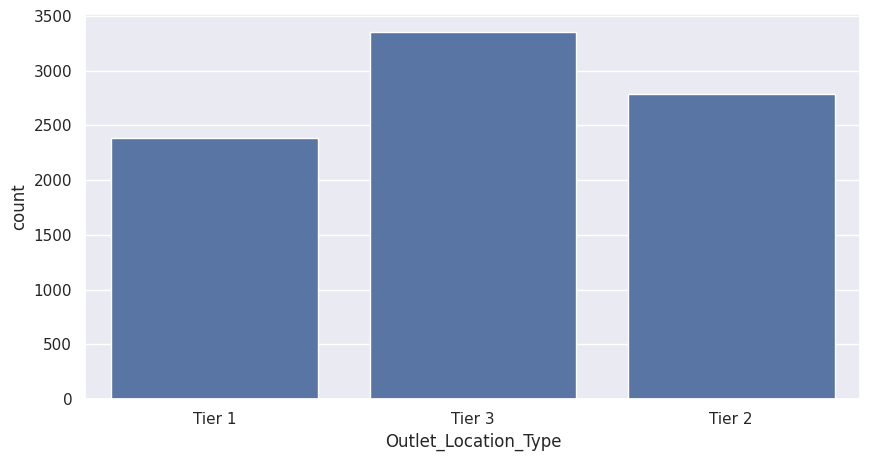

In [18]:
#Plot countplot for Outlet_Location_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Location_Type" , data=df_train)
plt.show()

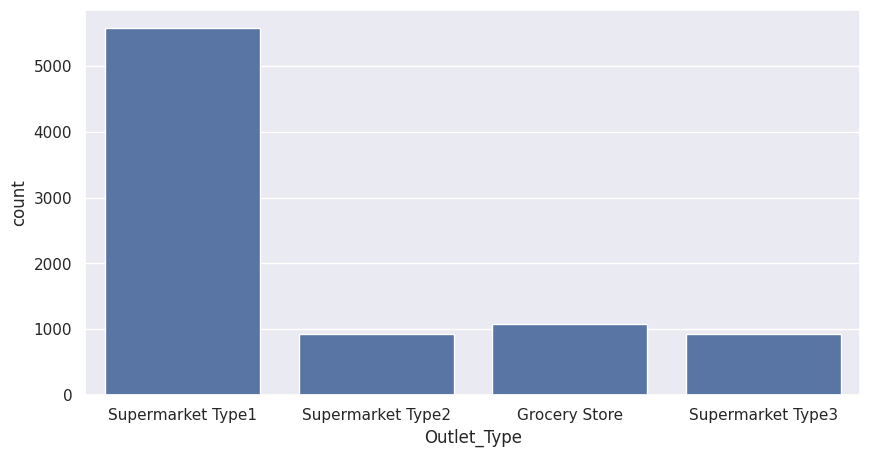

In [19]:
#Plot countplot for Outlet_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Type" , data=df_train)
plt.show()

In [20]:
#see categories in Item_Fat_Content column
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [21]:
#handle Item_Fat_Content column categories with replacement
df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [22]:
#see categories in Item_Fat_Content column
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [23]:
#Apply Label Encoding on categorical columns
le = LabelEncoder()

df_train['Item_Fat_Content'] = le.fit_transform(df_train['Item_Fat_Content'])

df_train['Item_Type'] = le.fit_transform(df_train['Item_Type'])

df_train['Outlet_Size'] = le.fit_transform(df_train['Outlet_Size'])

df_train['Outlet_Location_Type'] = le.fit_transform(df_train['Outlet_Location_Type'])

df_train['Outlet_Type'] = le.fit_transform(df_train['Outlet_Type'])

df_train['Item_Identifier'] = le.fit_transform(df_train['Item_Identifier'])

df_train['Outlet_Identifier'] = le.fit_transform(df_train['Outlet_Identifier'])

In [24]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,0,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,1,2,1,994.7052
5,758,10.395000,1,0.000000,0,51.4008,3,2009,0,2,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,1,2,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,0,2,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,1,1,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,1,1,1,4710.5350


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [26]:
sc = StandardScaler()

df_train['Item_Weight'] = sc.fit_transform(df_train['Item_Weight'].values.reshape(-1,1))

df_train['Item_Visibility'] = sc.fit_transform(df_train['Item_Visibility'].values.reshape(-1,1))

df_train['Item_MRP'] = sc.fit_transform(df_train['Item_MRP'].values.reshape(-1,1))

df_train['Item_Outlet_Sales'] = sc.fit_transform(df_train['Item_Outlet_Sales'].values.reshape(-1,1))

df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-0.841872,0,-0.970732,4,1.747454,9,1999,1,0,1,0.910601
1,8,-1.641706,1,-0.908111,14,-1.489023,3,2009,0,2,2,-1.018440
2,662,1.098554,0,-0.956917,10,0.010040,9,1999,1,0,1,-0.049238
3,1121,1.500838,1,-1.281758,6,0.660050,0,1998,1,2,0,-0.849103
4,1297,-0.929428,0,-1.281758,9,-1.399220,1,1987,1,2,1,-0.695373
5,758,-0.582754,1,-1.281758,0,-1.438734,3,2009,0,2,2,-0.952110
6,696,0.187501,1,-1.034813,13,-1.338238,1,1987,1,2,1,-1.076967
7,738,0.000000,0,1.188838,13,-0.533641,5,1985,0,2,3,1.079158
8,440,0.790926,1,-0.958331,5,-0.706908,7,2002,1,1,1,-0.647381
9,990,1.500838,1,0.548845,5,0.752008,2,2007,1,1,1,1.482212


In [27]:
#sepertate features and target

X = df_train.drop(columns=['Item_Outlet_Sales'])

Y = df_train['Item_Outlet_Sales']

In [29]:
#splittting data into training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [30]:
#print shape of features and training and testing data of features
print("Shape of Features:",X.shape)
print("Shape of Features_train:",X_train.shape)
print("Shape of Features_test:",X_test.shape)

Shape of Features: (8523, 11)
Shape of Features_train: (6818, 11)
Shape of Features_test: (1705, 11)


In [31]:
#print shape of Target and training and testing data of Target
print("Shape of Target:",Y.shape)
print("Shape of Target_train:",Y_train.shape)
print("Shape of Target_test:",Y_test.shape)

Shape of Target: (8523,)
Shape of Target_train: (6818,)
Shape of Target_test: (1705,)


Pseudo-Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1705

    accuracy                           1.00      1705
   macro avg       1.00      1.00      1.00      1705
weighted avg       1.00      1.00      1.00      1705

Confusion Matrix:
[[1705]]
Linear Regression Train MSE: 0.4492204974820558
Linear Regression Test MSE: 0.39157470871440825


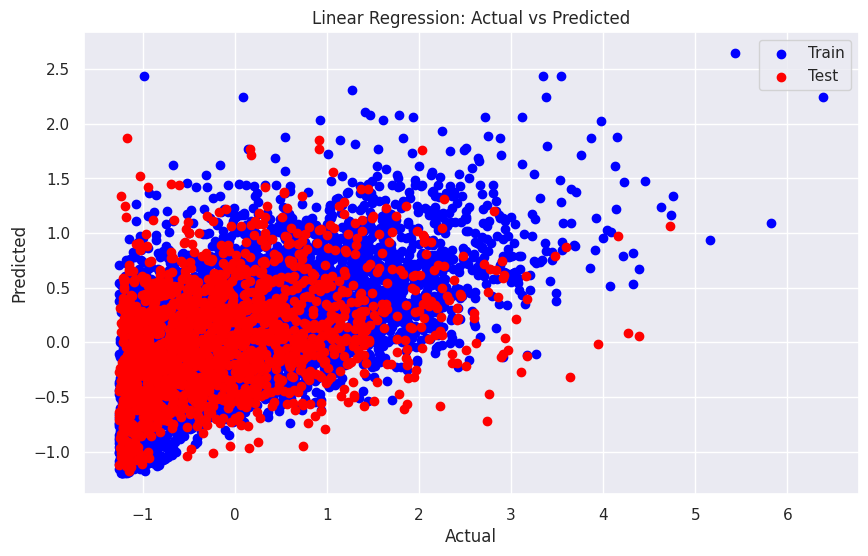

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Function to train and evaluate Linear Regression
def linear_regression(X_train, Y_train, X_test, Y_test):
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    Y_pred_train = lr.predict(X_train)
    Y_pred_test = lr.predict(X_test)
    train_mse = mean_squared_error(Y_train, Y_pred_train)
    test_mse = mean_squared_error(Y_test, Y_pred_test)

    # Define threshold for pseudo-accuracy calculation
    threshold = 10000  # Define your threshold value

    # Calculate pseudo-accuracy
    accuracy = np.mean(np.abs(Y_pred_test - Y_test) <= threshold)
    print(f'Pseudo-Accuracy: {accuracy:.2f}')

    # Classify based on threshold
    y_classified = np.where(Y_pred_test <= threshold, 1, 0)
    y_test_classified = np.where(Y_test <= threshold, 1, 0)

    # Print classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y_test_classified, y_classified))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_classified, y_classified))

    return lr, train_mse, test_mse

# Train Linear Regression model and evaluate
lr_model, train_mse, test_mse = linear_regression(X_train, Y_train, X_test, Y_test)
print("Linear Regression Train MSE:", train_mse)
print("Linear Regression Test MSE:", test_mse)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_pred_train, color='blue', label='Train')
plt.scatter(Y_test, Y_pred_test, color='red', label='Test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()


Pseudo-Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1705

    accuracy                           1.00      1705
   macro avg       1.00      1.00      1.00      1705
weighted avg       1.00      1.00      1.00      1705

Confusion Matrix:
[[1705]]
SVM Train MSE: 1.0633365760882412
SVM Test MSE: 0.9562528325456281


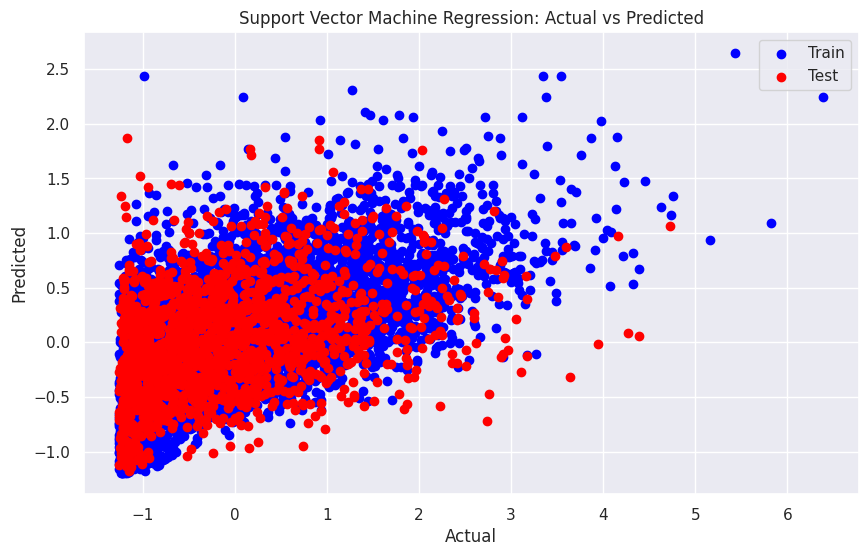

In [39]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
# Function to train and evaluate Support Vector Machine (SVM)
def support_vector_machine(X_train, Y_train, X_test, Y_test):
    svr = SVR()
    svr.fit(X_train, Y_train)
    Y_pred_train = svr.predict(X_train)
    Y_pred_test = svr.predict(X_test)
    train_mse = mean_squared_error(Y_train, Y_pred_train)
    test_mse = mean_squared_error(Y_test, Y_pred_test)

    # Define threshold for pseudo-accuracy calculation
    threshold = 10000  # Define your threshold value

    # Calculate pseudo-accuracy
    accuracy = np.mean(np.abs(Y_pred_test - Y_test) <= threshold)
    print(f'Pseudo-Accuracy: {accuracy:.2f}')

    # Classify based on threshold
    y_classified = np.where(Y_pred_test <= threshold, 1, 0)
    y_test_classified = np.where(Y_test <= threshold, 1, 0)

    # Print classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y_test_classified, y_classified))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_classified, y_classified))

    return svr, train_mse, test_mse

# Train SVM model and evaluate
svr_model, train_mse, test_mse = support_vector_machine(X_train, Y_train, X_test, Y_test)
print("SVM Train MSE:", train_mse)
print("SVM Test MSE:", test_mse)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_pred_train, color='blue', label='Train')
plt.scatter(Y_test, Y_pred_test, color='red', label='Test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Machine Regression: Actual vs Predicted')
plt.legend()
plt.show()

Pseudo-Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1705

    accuracy                           1.00      1705
   macro avg       1.00      1.00      1.00      1705
weighted avg       1.00      1.00      1.00      1705

Confusion Matrix:
[[1705]]
KNN Train MSE: 0.6321096895276471
KNN Test MSE: 0.8691658479407511


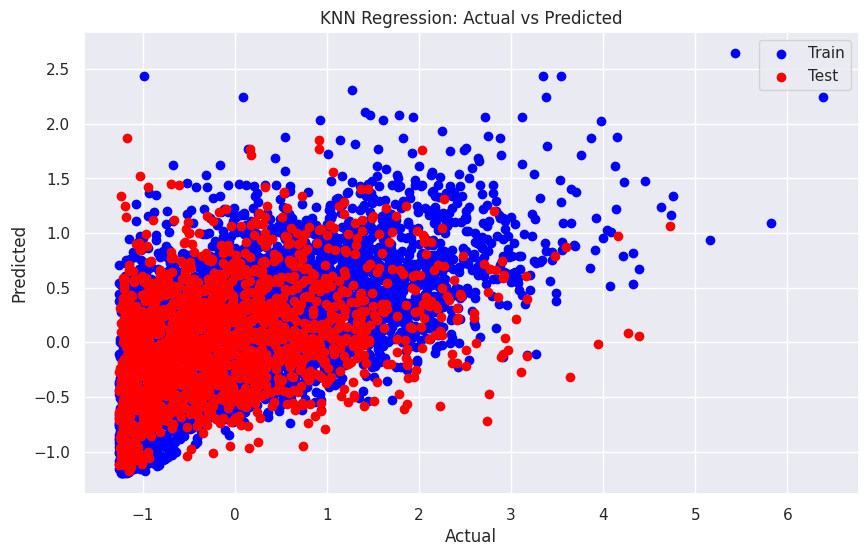

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Function to train and evaluate K-Nearest Neighbors (KNN)
def knn_regressor(X_train, Y_train, X_test, Y_test):
    knn = KNeighborsRegressor()
    knn.fit(X_train, Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)
    train_mse = mean_squared_error(Y_train, Y_pred_train)
    test_mse = mean_squared_error(Y_test, Y_pred_test)

    # Define threshold for pseudo-accuracy calculation
    threshold = 10000  # Define your threshold value

    # Calculate pseudo-accuracy
    accuracy = np.mean(np.abs(Y_pred_test - Y_test) <= threshold)
    print(f'Pseudo-Accuracy: {accuracy:.2f}')

    # Classify based on threshold
    y_classified = np.where(Y_pred_test <= threshold, 1, 0)
    y_test_classified = np.where(Y_test <= threshold, 1, 0)

    # Print classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y_test_classified, y_classified))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_classified, y_classified))

    return knn, train_mse, test_mse, Y_pred_train, Y_pred_test

# Train KNN model and evaluate
knn_model, train_mse, test_mse, Y_pred_train, Y_pred_test = knn_regressor(X_train, Y_train, X_test, Y_test)
print("KNN Train MSE:", train_mse)
print("KNN Test MSE:", test_mse)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_pred_train, color='blue', label='Train')
plt.scatter(Y_test, Y_pred_test, color='red', label='Test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN Regression: Actual vs Predicted')
plt.legend()
plt.show()


Pseudo-Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1705

    accuracy                           1.00      1705
   macro avg       1.00      1.00      1.00      1705
weighted avg       1.00      1.00      1.00      1705

Confusion Matrix:
[[1705]]
Decision Tree Train MSE: 0.0
Decision Tree Test MSE: 0.7687260263453076


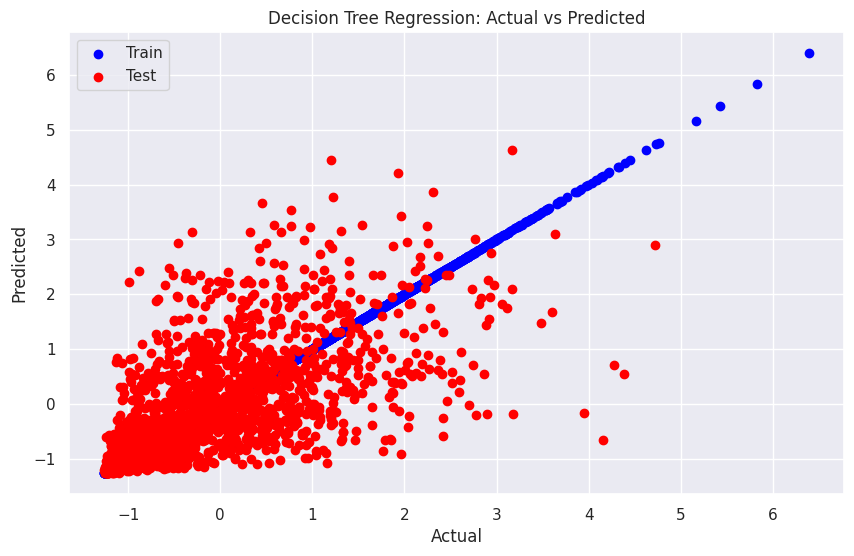

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Function to train and evaluate Decision Tree
def decision_tree(X_train, Y_train, X_test, Y_test):
    dt = DecisionTreeRegressor()
    dt.fit(X_train, Y_train)
    Y_pred_train = dt.predict(X_train)
    Y_pred_test = dt.predict(X_test)
    train_mse = mean_squared_error(Y_train, Y_pred_train)
    test_mse = mean_squared_error(Y_test, Y_pred_test)

    # Define threshold for pseudo-accuracy calculation
    threshold = 10000  # Define your threshold value

    # Calculate pseudo-accuracy
    accuracy = np.mean(np.abs(Y_pred_test - Y_test) <= threshold)
    print(f'Pseudo-Accuracy: {accuracy:.2f}')

    # Classify based on threshold
    y_classified = np.where(Y_pred_test <= threshold, 1, 0)
    y_test_classified = np.where(Y_test <= threshold, 1, 0)

    # Print classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y_test_classified, y_classified))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_classified, y_classified))

    return dt, train_mse, test_mse, Y_pred_train, Y_pred_test

# Train Decision Tree model and evaluate
dt_model, train_mse, test_mse, Y_pred_train, Y_pred_test = decision_tree(X_train, Y_train, X_test, Y_test)
print("Decision Tree Train MSE:", train_mse)
print("Decision Tree Test MSE:", test_mse)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_pred_train, color='blue', label='Train')
plt.scatter(Y_test, Y_pred_test, color='red', label='Test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.legend()
plt.show()


In [44]:
# Function to predict using the trained Linear Regression model
def predict_lr(model, feature_names):
    inputs = []
    for feature in feature_names:
        value = input("Enter value for {}: ".format(feature))
        inputs.append(float(value))
    inputs = np.array(inputs).reshape(1, -1)
    prediction = model.predict(inputs)
    return prediction

# Prompt user to input values for prediction
print("Please enter the following values for prediction:")
feature_names = X_test.columns.tolist()  # Assuming X_test is the test data
prediction = predict_lr(lr_model, feature_names)
print("Predicted output:", prediction)


Please enter the following values for prediction:
Enter value for Item_Identifier: 1
Enter value for Item_Weight: 10
Enter value for Item_Fat_Content: 0
Enter value for Item_Visibility: 2.3
Enter value for Item_Type: 4
Enter value for Item_MRP: 100
Enter value for Outlet_Identifier: 9
Enter value for Outlet_Establishment_Year: 2013
Enter value for Outlet_Size: 1
Enter value for Outlet_Location_Type: 2
Enter value for Outlet_Type: 1
Predicted output: [57.09586813]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
